#Titanic Dataset — Data Cleaning & Preprocessing

### Internship Task 1  

**Objective:**  
To clean and preprocess the Titanic dataset for machine learning by performing missing value treatment, feature encoding, normalization, outlier handling, and advanced feature engineering.

This notebook follows a structured real-world data science pipeline and prepares a high-quality dataset for downstream machine learning modeling.


##Data Loading & Initial Exploration

In [1]:
#Import Libraries & Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic dataset.csv")

In [3]:
df.head()

,Passenger Id,Survived,P class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger Id  891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   P class       891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

,0
Passenger Id,0
Survived,0
P class,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Handle Missing Values  

Real-world datasets often contain missing values that can negatively impact ML models.  
In this step, missing values are handled using statistical and advanced imputation techniques.

In [6]:
#Age → Fill with Median
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-2899252453.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [7]:
#Embarked → Fill with Mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3962592256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [8]:
#Cabin → Drop (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

In [9]:
df.isnull().sum()

,0
Passenger Id,0
Survived,0
P class,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


##Convert Categorical → Numerical (Encoding)

In [10]:
#Drop unnecessary columns
df.drop(columns=['Name','Ticket'], inplace=True)

In [11]:
#Encode Sex
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [12]:
#One-hot Encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

##Normalize / Standardize Numerical Features

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['Age','Fare']

df[num_cols] = scaler.fit_transform(df[num_cols])

##Outlier Detection & Removal

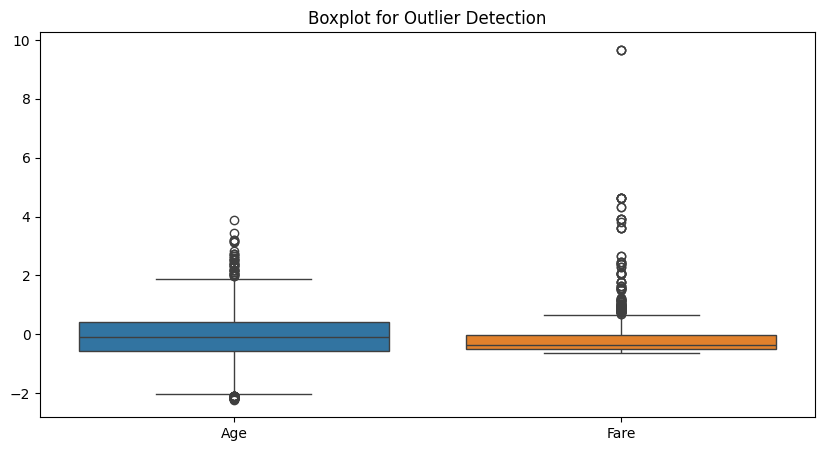

In [14]:
#Boxplot Visualization
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Age','Fare']])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [15]:
#Remove Fare Outliers using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Fare'] >= Q1 - 1.5*IQR) & (df['Fare'] <= Q3 + 1.5*IQR)]

##Final Dataset Check


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger Id  775 non-null    int64  
 1   Survived      775 non-null    int64  
 2   P class       775 non-null    int64  
 3   Sex           775 non-null    int64  
 4   Age           775 non-null    float64
 5   SibSp         775 non-null    int64  
 6   Parch         775 non-null    int64  
 7   Fare          775 non-null    float64
 8   Embarked_Q    775 non-null    bool   
 9   Embarked_S    775 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 56.0 KB


In [17]:
df.isnull().sum()

,0
Passenger Id,0
Survived,0
P class,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0


In [18]:
df.head()

,Passenger Id,Survived,P class,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,-0.565736,1,0,-0.502445,False,True
2,3,1,3,1,-0.258337,0,0,-0.488854,False,True
3,4,1,1,1,0.433312,1,0,0.420730,False,True
4,5,0,3,0,0.433312,0,0,-0.486337,False,True
5,6,0,3,0,-0.104637,0,0,-0.478116,True,False


##Advanced Missing Value Handling

In [19]:
#Instead of simple median fill:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['Age','Fare']] = imputer.fit_transform(df[['Age','Fare']])

##Feature Engineering

In [20]:
#create new meaningful features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

##Correlation Analysis + Heatmap

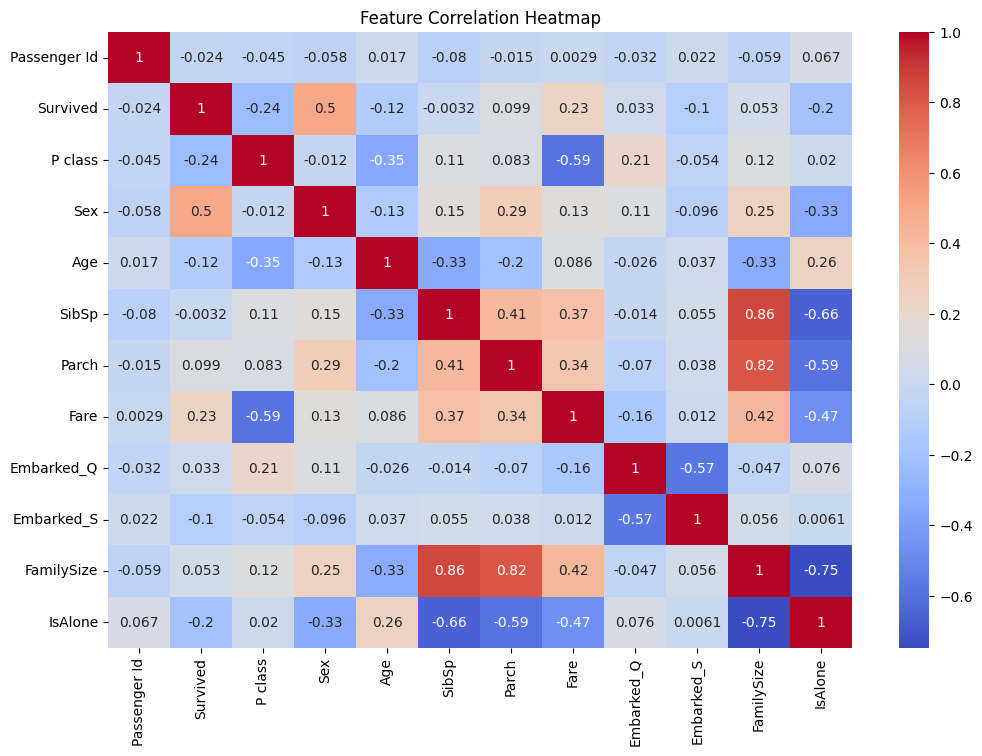

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

##Outlier Comparison Study

In [22]:
before = df.shape[0]

# remove outliers
df = df[(df['Fare'] < 3)]

after = df.shape[0]

print("Rows before:", before)
print("Rows after:", after)

Rows before: 775
Rows after: 775


##Survival Pattern Analysis

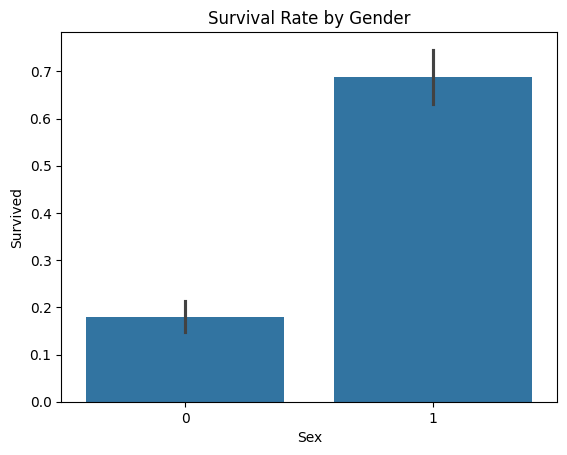

In [23]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

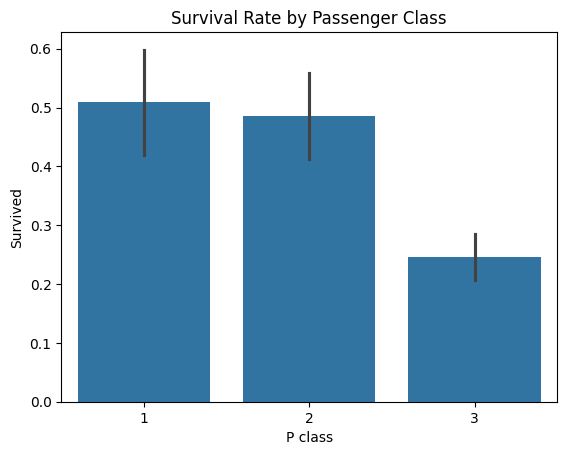

In [24]:
sns.barplot(x='P class', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

##Feature Importance Using ML

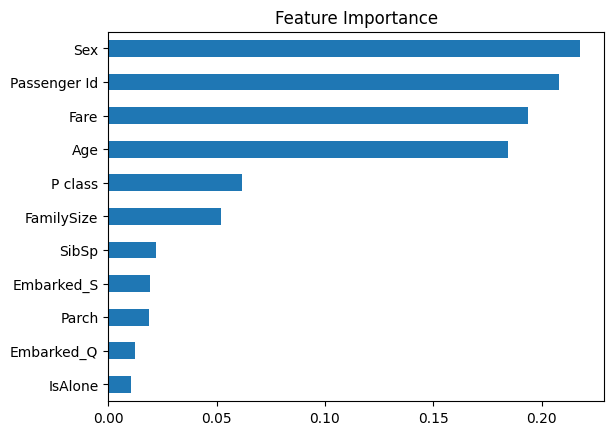

In [26]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Survived', axis=1)
y = df['Survived']

model = RandomForestClassifier()
model.fit(X,y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()

##Conclusion  

In this task, the Titanic dataset was successfully cleaned and preprocessed using industry-level techniques.  
Advanced feature engineering and analytical steps were performed to improve dataset quality and extract meaningful insights.  

This cleaned dataset is now fully prepared for:
- Exploratory Data Analysis (EDA)  
- Machine Learning model training  
- Performance evaluation  

This task strengthened my understanding of real-world data preprocessing pipelines used in AI/ML projects.